In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #library untuk membuat grafik dan statistik
import matplotlib.pyplot as plt #ntuk melakukan visualisasi data
plt.style.use('ggplot')
from matplotlib.pyplot import figure #Untuk merubah ukuran gambar
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
# pd.set_option("display.max_row", None)
pd.set_option("display.max_columns", None)
# Kami ingin menampilkan semua float dengan hanya memiliki satu angka desimal dibelakang koma.
pd.options.display.float_format = "{:.5f}".format
from statistics import mean
df = pd.read_excel("Movies_jadi.xlsx")
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40000,927000.00000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00000,46998772.00000,Warner Bros.,146.00000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80000,65000.00000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00000,58853106.00000,Columbia Pictures,104.00000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70000,1200000.00000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00000,538375067.00000,Lucasfilm,124.00000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70000,221000.00000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00000,83453539.00000,Paramount Pictures,88.00000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30000,108000.00000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00000,39846344.00000,Orion Pictures,98.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,The Batman,PG-13,Action,2022,"March 2, 2022 (United States)",7.90000,547540.00000,Matt Reeves,Matt Reeves,Robert Pattinson,United States,200000000.00000,770836163.00000,Warner Bros,176.00000
7694,The Bad Guys,PG,Animation,2022,"March 25, 2022 (United States)",6.90000,27486.00000,Pierre Perifel,Aaron Blabey,Sam Rockwell,United States,70000000.00000,245613085.00000,DreamWorks Animation,100.00000
7695,The Man from Toronto,PG-13,Action,2022,"June 24, 2022 (United States)",5.80000,29769.00000,Patrick Hughes,Robbie Fox,Kevin Hart,United States,75000000.00000,171000000.00000,Netflix,110.00000
7696,Fantastic Beasts: The Secrets of Dumbledore,PG-13,Action,2022,"April 13, 2022 (United States)",6.20000,114128.00000,David Yates,J.K. Rowling,Eddie Redmayne,United States,200000000.00000,405161334.00000,Warner Bros,142.00000


In [2]:
print('Dataset ini berisikan data dari film tahun',df.year.min(),'hingga',df.year.max())

Dataset ini berisikan data dari film tahun 1980 hingga 2022


In [3]:
Released_Date_Country = df['released'].str.split(pat='(', expand=True)
Released_Date_Country = Released_Date_Country.rename(columns ={0:"releaseddate", 1:"releasedcountry"})
Released_Date_Country['releasedcountry'] = Released_Date_Country['releasedcountry'].astype(str).str.replace(')','')
Released_Date_Country

C:\Users\rendi\AppData\Local\Temp\ipykernel_11972\1719890781.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Released_Date_Country['releasedcountry'] = Released_Date_Country['releasedcountry'].astype(str).str.replace(')','')


,releaseddate,releasedcountry
0,"June 13, 1980",United States
1,"July 2, 1980",United States
2,"June 20, 1980",United States
3,"July 2, 1980",United States
4,"July 25, 1980",United States
...,...,...
7693,"March 2, 2022",United States
7694,"March 25, 2022",United States
7695,"June 24, 2022",United States
7696,"April 13, 2022",United States


Memisah satu kolom released menjadi 2 kolom yang berbeda yakni releasedcountry dan releaseddate dikarenakan pada kolom released terdapat nilai datetime dan string sehingga akan lebih baik jika dipisah keduanya.

In [4]:
df = pd.concat([df, Released_Date_Country], axis = 1)
del df["released"]
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,releasedcountry
0,The Shining,R,Drama,1980,8.40000,927000.00000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00000,46998772.00000,Warner Bros.,146.00000,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.80000,65000.00000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00000,58853106.00000,Columbia Pictures,104.00000,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70000,1200000.00000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00000,538375067.00000,Lucasfilm,124.00000,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.70000,221000.00000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00000,83453539.00000,Paramount Pictures,88.00000,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.30000,108000.00000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00000,39846344.00000,Orion Pictures,98.00000,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,The Batman,PG-13,Action,2022,7.90000,547540.00000,Matt Reeves,Matt Reeves,Robert Pattinson,United States,200000000.00000,770836163.00000,Warner Bros,176.00000,"March 2, 2022",United States
7694,The Bad Guys,PG,Animation,2022,6.90000,27486.00000,Pierre Perifel,Aaron Blabey,Sam Rockwell,United States,70000000.00000,245613085.00000,DreamWorks Animation,100.00000,"March 25, 2022",United States
7695,The Man from Toronto,PG-13,Action,2022,5.80000,29769.00000,Patrick Hughes,Robbie Fox,Kevin Hart,United States,75000000.00000,171000000.00000,Netflix,110.00000,"June 24, 2022",United States
7696,Fantastic Beasts: The Secrets of Dumbledore,PG-13,Action,2022,6.20000,114128.00000,David Yates,J.K. Rowling,Eddie Redmayne,United States,200000000.00000,405161334.00000,Warner Bros,142.00000,"April 13, 2022",United States


Menyatukan kembali kolom releaseddate releasedcountry yang telah didapat kedalam dataframe utama, lalu menghapus kolom lama yaitu kolom released.


In [5]:
df['revenue']=df.apply(lambda revenue : revenue['gross'] - revenue['budget'], axis=1)

Menambahkan kolom baru yakni revenue. Jika gross adalah pendapatan kotor, dan revenue sendiri adalah pendapatan bersih setelah pendapatan kotor atau kolom Gross dikurangi biaya pembuatan film atau kolom budget. Disini menggunakan lamda dengan variabel revenue untuk mengambil semua nilai yang ada pada kolom gross dan mengurangkannya dengan kolom budget lalu di simpan pada kolom baru yakni kolom revenue pada DataFrame utama yakni df

In [6]:
df = df.dropna(axis=0, subset=['budget','gross','votes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 7697
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5466 non-null   object 
 1   rating           5454 non-null   object 
 2   genre            5466 non-null   object 
 3   year             5466 non-null   int64  
 4   score            5466 non-null   float64
 5   votes            5466 non-null   float64
 6   director         5466 non-null   object 
 7   writer           5466 non-null   object 
 8   star             5466 non-null   object 
 9   country          5465 non-null   object 
 10  budget           5466 non-null   float64
 11  gross            5466 non-null   float64
 12  company          5464 non-null   object 
 13  runtime          5465 non-null   float64
 14  releaseddate     5466 non-null   object 
 15  releasedcountry  5466 non-null   object 
 16  revenue          5466 non-null   float64
dtypes: float64(6),

Cleaning data dengan menggunakan dropna subset yakni kolom budget gross dan votes. Subset disini berguna untuk menghapus baris yang kolom budget atau gross atau votesnya memiliki nilai NaN.

In [7]:
from datetime import datetime
df = df.astype({"budget" : int, "gross" : int, "votes" : int})
df['releaseddate'] = pd.to_datetime(df['releaseddate']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 7697
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             5466 non-null   object        
 1   rating           5454 non-null   object        
 2   genre            5466 non-null   object        
 3   year             5466 non-null   int64         
 4   score            5466 non-null   float64       
 5   votes            5466 non-null   int32         
 6   director         5466 non-null   object        
 7   writer           5466 non-null   object        
 8   star             5466 non-null   object        
 9   country          5465 non-null   object        
 10  budget           5466 non-null   int32         
 11  gross            5466 non-null   int32         
 12  company          5464 non-null   object        
 13  runtime          5465 non-null   float64       
 14  releaseddate     5466 non-null   datetim

Mengubah jenis tipe data pada beberapa kolom agar sesuai dengan yang diinginkan, contohnya kolom budget diubah menjadi int yang awalnya adalah berupa float dan kolom releaseddate diubah menjadi tipe data datetime karena berisikan tanggal dari suatu perilisan film. Menggunakan astype untuk mengganti tipe data pada setiap kolom yang ingin diganti. Lalu mengganti tipe kolom releaseddate dengan datetime menggunakan pd.to_datetime namun tidak lupa mengimport-kan library dan modulnya.


In [8]:
print("Nilai Null Pada Masing-Masing Kolom\n")

for kolom in df.columns:
    print(kolom,"=>",df[kolom].isna().sum())

Nilai Null Pada Masing-Masing Kolom

name => 0
rating => 12
genre => 0
year => 0
score => 0
votes => 0
director => 0
writer => 0
star => 0
country => 1
budget => 0
gross => 0
company => 2
runtime => 1
releaseddate => 0
releasedcountry => 0
revenue => 0


Mengecek nilai null pada masing-masing kolom dalam Dataframe. Meraih semua kolom yang ada pada df. Menampilkan jumlah nilai null perkolomnya dengan menggunakan isna dan sum

***
# Budget vs Success
***
### Apakah anggaran dapat memengaruhi kesuksesan sebuah film???
##### Faktor yang ditinjau adalah dari segi Gross (Pendapatan Kotor) dan Rating suatu film

In [9]:
Loss = df.loc[df["revenue"]<0]
Film_Loss= len(Loss["name"])
Loss.sort_values("revenue", axis = 0, ascending = True)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,releasedcountry,revenue
7689,The Gray Man,PG-13,Action,2022,6.80000,2506,Anthony Russo,Joe Russo,Ryan Gosling,United States,200000000,249462,Netflix,122.00000,2022-07-22,United States,-199750538.00000
7465,The Irishman,R,Biography,2019,7.80000,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000,968853,Tribeca Productions,209.00000,2019-11-27,United States,-158031147.00000
3485,The 13th Warrior,R,Action,1999,6.60000,119000,John McTiernan,Michael Crichton,Antonio Banderas,United States,160000000,61698899,Touchstone Pictures,102.00000,1999-08-27,United States,-98301101.00000
4218,The Adventures of Pluto Nash,PG-13,Action,2002,3.80000,25000,Ron Underwood,Neil Cuthbert,Eddie Murphy,United States,100000000,7103973,Castle Rock Entertainment,95.00000,2002-08-16,United States,-92896027.00000
6023,Jin ling shi san chai,R,Drama,2011,7.60000,51000,Yimou Zhang,Heng Liu,Christian Bale,China,94000000,2855644,Beijing New Picture Film,146.00000,2011-12-16,China,-91144356.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,The Perfect Host,R,Comedy,2010,6.80000,26000,Nick Tomnay,Nick Tomnay,David Hyde Pierce,United States,500000,453708,Stacey Testro International,93.00000,2011-05-07,Japan,-46292.00000
467,My Brother's Wedding,Not Rated,Drama,1983,7.20000,826,Charles Burnett,Charles Burnett,Everett Silas,United States,50000,26177,Charles Burnett Productions,115.00000,1985-03-01,United States,-23823.00000
1025,Born American,R,Action,1986,4.10000,1900,Renny Harlin,Renny Harlin,Mike Norris,United States,3401376,3388020,Cinema Group Ventures,95.00000,1986-12-19,Finland,-13356.00000
412,The Osterman Weekend,R,Action,1983,5.90000,8200,Sam Peckinpah,Robert Ludlum,Rutger Hauer,United States,6500000,6486797,Osterman Weekend Associates,103.00000,1983-11-04,United States,-13203.00000


Mengecek apakah ada yang medapat kerugian dalam pembuatan film. Mengambil semua film yang merugi dengan mengecek apakah revenue kurang dari 0 Jika ingin tau jumlah film yang merugi atau loss. Mengurutkan dari yang loss-nya tertinggi

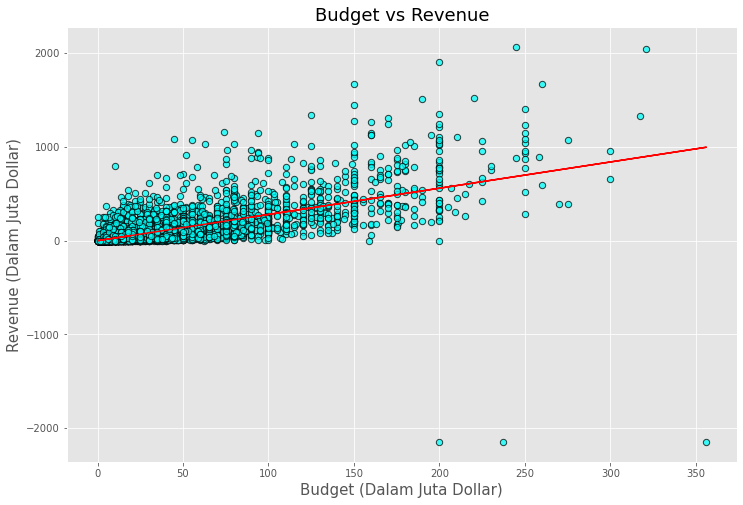

In [10]:
# budget vs Revenue (gross)

plt.scatter(df['budget']/1000000, df['gross']/1000000,
            s=40, c='#00FFFB', edgecolor='black', linewidth=1, alpha=0.75) 

plt.title('Budget vs Revenue', fontsize=18) 
plt.xlabel('Budget (Dalam Juta Dollar)', fontsize=15) 
plt.ylabel('Revenue (Dalam Juta Dollar)', fontsize=15) 

m = df['gross'].mean()/df['budget'].mean() 
b = df['gross'].mean() - (m*df['budget'].mean()) 
plt.plot(df['budget']/1000000, m*df['budget']/1000000 + b/1000000, c='red') 

Membuat Scatter plot untuk kolom budget dan revenue. Disini untuk mengubah nilai budget dan gross kedalam nilai yang lebih kecil agar mudah di visualisasi, yaitu diturunkan sebesar 1 juta dengan membagi nilai kedua kolomnya dengan 1000000. Plt.ttile sebagai judul untuk plot. plt.xlabel sebagai xlabel untuk plot, text yang berada dibawah dan plt.ylabel sebagai ylabel untuk plot, text yang berada disebelah kiri.

Lalu membuat line untuk disatukan kedalam Scatter plot yang telah dibuat diatas, sebegai pembantu menentukan korelasi negatif atau positifnya suatu hubungan antar variabel kolom. Declare variabel m dengan nilai dari rata-rata kolom gross dibagi rata-rata kolom budget. Declare variabel b dengan nilai dari rata-rata kolom gross dan dikurangi oleh nilai dari m dikali rata-rata kolom budget. Membuat line plot dari nilai yang telah disebutkan dan memberikan warna merah untuk garisnya.



C:\Users\rendi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rendi\AppData\Local\Temp\ipykernel_11972\3071787475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabel)


[Text(-50000000.0, 0, '$-50,000,000'),
 Text(0.0, 0, '$0'),
 Text(50000000.0, 0, '$50,000,000'),
 Text(100000000.0, 0, '$100,000,000'),
 Text(150000000.0, 0, '$150,000,000'),
 Text(200000000.0, 0, '$200,000,000'),
 Text(250000000.0, 0, '$250,000,000'),
 Text(300000000.0, 0, '$300,000,000'),
 Text(350000000.0, 0, '$350,000,000'),
 Text(400000000.0, 0, '$400,000,000')]

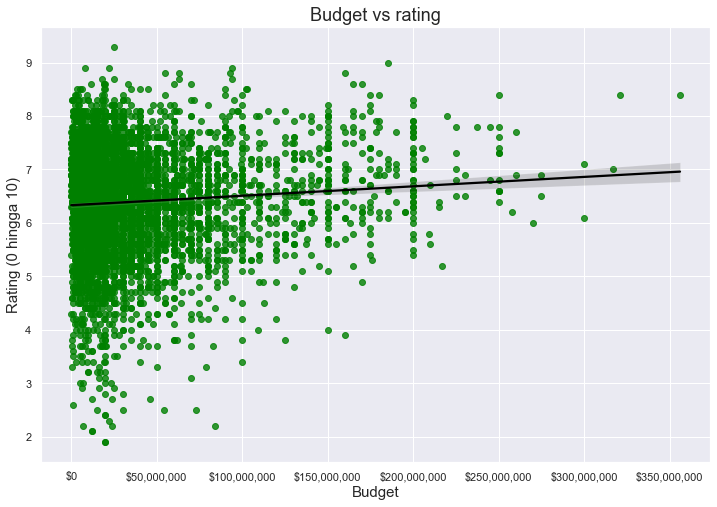

In [11]:
# budget vs Rating (gross)

sns.set()
g = sns.regplot('budget', 'score', data=df, scatter_kws={'color':'green'},
           line_kws={'color':'black'}) 

plt.title('Budget vs rating', fontsize=18) # Judul untuk plot.
plt.xlabel('Budget', fontsize=15) #xlabel untuk plot, text yang berada dibawah
plt.ylabel('Rating (0 hingga 10)', fontsize=15) #ylabel untuk plot, text yang berada disebelah kiri

ticks = g.get_xticks() 
xlabel = ['$' + '{:,.0f}'.format(x) for x in ticks]
g.set_xticklabels(xlabel)

Membuat Scatter plot dan line secara bersamaan menggunakan seaborn dan mengetahui regresinya, membuat scatter plot dengan warna hijau dan line plot dengan garis hitam dan yang dibandingkan adalah data kolom budget dan score dari data yang ada pada dataframe df. Membuat label baru untuk sumbu-x yang biasa disebut xticklabel dalam seaborn. Mengambil label sumbu-x dan menyimpannya kedalam variabel ticks. xlabel adalah variabel baru yang digunakan untuk menyimpan nilai dari label sumbu-x yang baru. set_xticklabels adalah method yang digunakan untuk mengubah label sumbu-x dari plot g menjadi nilai dari xlabel

***
#  Genre vs Success
***
### Apakah genre dapat memengaruhi kesuksesan sebuah film???
##### Faktor yang ditinjau adalah dari segi Revenue (Penghasilan Bersih) suatu film

In [12]:
genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index() 
genre.columns = ['genre', 'jumlah']
genre

,genre,jumlah
0,Comedy,1497
1,Action,1435
2,Drama,869
3,Crime,402
4,Adventure,328
5,Biography,312
6,Animation,282
7,Horror,255
8,Fantasy,42
9,Mystery,18


Mengurutkan genre berdasarkan banyak film nya. Menggunakan groupby berarti mengambil nilai unique dari kolom Genre dan menghitung jumlahnya, serta menggunakan sort_values sebagai pengurutannya. Lalu mengubah kolom pada dataframe genre menjadi genre dan jumlah

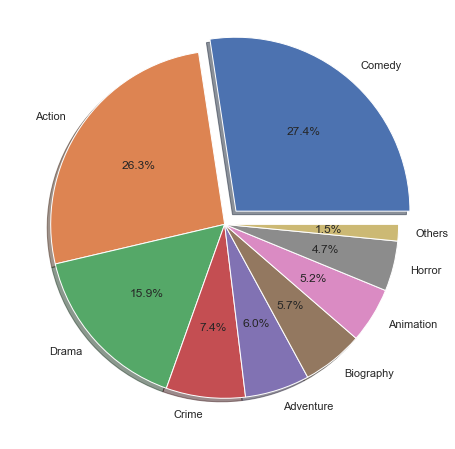

In [13]:
others = genre.loc[list(range(8,14))]['jumlah'].sum()
genre = genre.drop(list(range(8,15)))
genre.loc[8] = ['Others', others]
jenis_genre = genre['genre']
jumlah = genre['jumlah']
plt.pie(jumlah, labels = jenis_genre, explode = [.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', shadow = True)
plt.show()

Membuat pengelompokan dari 7 genre terakhir menjadi others karena memiliki jumlah film kurang dari 50 buah. Lalu mengambil semua jumlah dari 7 genre terakhir karena mereka memiliki jumlah film yang sedikit. Dilanjut mengambil value dari kolom genre dan disimpan pada jenis_genre. Mengambil value dari kolom jumlah dan menyimpannya kedalam variabel banyak. Membuat pie chart berdasarkan variabel banyak dan labelnya adalah jenis_genre dengan explode yaitu memberi jarak antar satu pie dengan pie lainnya.

Pie chart diatas menampilkan banyaknya jumlah film per-genre dalam persentase pi chart. Disimpulkan bahwa genre komedi action dan drama adalah genre terbanyak, dan others adalah nilai untuk genre yang jumlah filmnya kurang dari 50 lalu dijumlahkan nilainya menjadi satu yakni others.

In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)

import bokeh.palettes

Untuk memvisualisasikan revenue rata-rata untuk setiap Genre selama bertahun-tahun, pertama disini mengurutkan genre berdasarkan jumlah filmnya terlebih dahulu, dengan menggunakan groupby berdasarkan genre pada dataframe df dan menghitung valuenya dengan otomatis karena menggunakan groupby, lalu jumlah banyaknya film pergenre tadi diurutkan secaraa descending. selanjutnya menyediakan dataframe baru untuk dibuat line chart. disini groupby dilakukan pada df dan berdasarkan kolom genre dan year, berdasarkan rata-rata revenuenya. lalu dilanjutkan dengan Mengubah genre dengan jumlah banyak data yang dapat diabaikan, jumlah genre yang kurang dari 50 akan di hapus, dengan cara drop pada index ke 8 hingga 15. lalu setelahnya ada syntax  genre_revenue['revenue']/1000000 untuk menurunkan nilai revenue menjadi lebih kecil agar lebih enak dilihat ketika di linechart nantinya. lalu setelah di bagi dalam nilai juta akan disimpan kembali ke kolom revenue pada dataframe genre_revenue. lalu setelahnya adalh membuat penjelas untuk line chart, yaitu dengan plt.title, plt.xlabel dan plt.ylabel. setelahnya baru visualisasi dengan menggunakan sns.lineplot(data=genre_revenue, x="year", y="revenue", hue="genre") yang berarti data yang digunakan adalah dari genre_revenue, dengan nilai x adalah kolom year, dan nilai y adalah kolom revenue, dan hue nya adalah kolom genre. lalu setelahnya akan muncul line chart seperti gambar diatas.

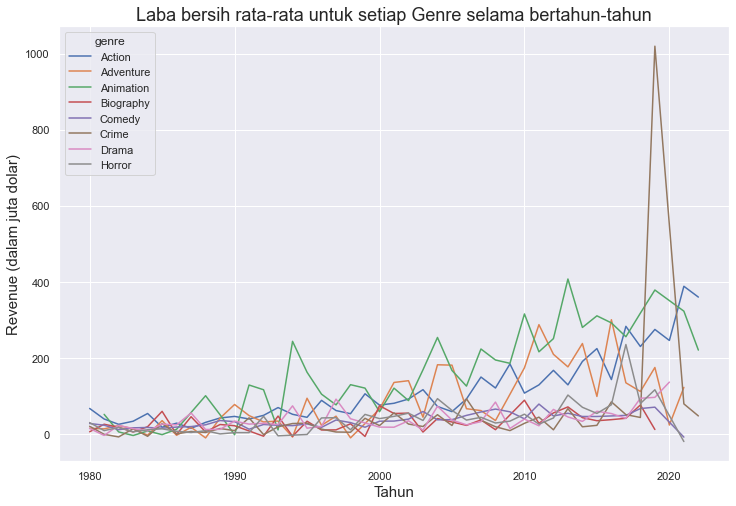

In [15]:
# urutkan genre berdasarkan jumlah film
genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']

# Menyediakan dataframe untuk dibuat line chart
genre_revenue = df.groupby(['genre', 'year']).revenue.mean().reset_index()

# Mengubah genre dengan jumlah banyak data yang dapat diabaikan
others = genre.loc[list(range(8,15))]['genre'].reset_index().drop(columns=['index'])['genre'].values.tolist()
index = []
for i in others:
    index.extend(genre_revenue[genre_revenue.genre == i].index)
genre_revenue = genre_revenue.drop(index)

genre_revenue['revenue'] = genre_revenue['revenue']/1000000
genre_revenue

plt.title('Laba bersih rata-rata untuk setiap Genre selama bertahun-tahun', fontsize=18) # Judul untuk plot.
plt.xlabel('Tahun', fontsize=15) #xlabel untuk plot, text yang berada dibawah
plt.ylabel('Revenue (dalam juta dolar)', fontsize=15) #ylabel untuk plot, text yang berada disebelah kiri

p = sns.lineplot(data=genre_revenue, x="year", y="revenue", hue="genre")


Line chart ini memvisualisasikan tren historis genre film terhadap revenue mereka selama bertahun-tahun. Untuk mencatat beberapa temuan yang jelas dalam grafik, peningkatan revenue yang didapat oleh genre Animasi termasuk relatif konsisten selama bertahun-tahun
Genre crime bisa dibilang cukup mengejutkan karena mengalami lonjakan yang bombastis dari perkiraan tahun 2018 hingga 2019an. Namun sangat disayangkan tidak bisa bertahan cukup lama karena ditahun berikutnya mengalami penurunan drastis juga.
Genre action adalah genre yang dimana pertahunnya mengalami kenaikan yang paling konsisten diantara genre lainnya.

In [16]:
# sort out genre by movie counts again
genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']

# setup dataframe to graph
genre_revenue = df.groupby(['genre', 'year']).revenue.mean().reset_index()

# drop genres with negligible amount of data points
others = genre.loc[list(range(8,15))]['genre'].reset_index().drop(columns=['index'])['genre'].values.tolist()
index = []
for i in others:
    index.extend(genre_revenue[genre_revenue.genre == i].index)
genre_revenue = genre_revenue.drop(index)

# It seems like there's an error in 'Crime' genre with 'Zodiac' movie, so remove it
genre_revenue[genre_revenue.genre == 'Crime'].max()
genre_revenue = genre_revenue.drop([238])

# formatting for Bokeh
genre_revenue['revenue'] = genre_revenue['revenue']/1000000
dict_group_data = {'xs':[genre_revenue.loc[(genre_revenue['genre']==name),'year'].values \
                         for name in genre_revenue['genre'].unique()],
                  'ys': [genre_revenue.loc[(genre_revenue["genre"]==name),'revenue'].values\
                         for name in genre_revenue['genre'].unique()],
                  'labels': genre_revenue['genre'].unique(),
                  'color': bokeh.palettes.Category20[8]}
source = ColumnDataSource(dict_group_data)

hover = HoverTool(tooltips=[
    ('Genre', '@labels')
])

p = figure(x_axis_label = 'Year', 
           y_axis_label = 'revenue Profit (in million $)', 
           width = 1000,
           tools=[hover, "save","pan","box_zoom","reset","wheel_zoom"]) 

p.multi_line(xs= "xs", ys= "ys", line_color= "color", source = source, legend = "labels",line_width=3)
p.legend.location = "top_left"

p.title.text = "Average net profit for each Genre across years"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

# Foreign Movie

In [17]:
top_countries = df['country'].value_counts().head(14).reset_index().drop([0])
top_countries.columns = ["negara","jumlah"]
top_countries

,negara,jumlah
1,United Kingdom,496
2,Canada,111
3,France,105
4,Germany,82
5,Australia,42
6,Japan,31
7,China,26
8,Hong Kong,25
9,Ireland,21
10,Italy,19


Untuk mencari negara terbaik, disini menggunakan variabel top_countries untuk menyimpan value dari jumlah film berdasarkan negaranya dan diambil hanya 13 besar dengan menggunakan value count, lalu head(14) dan drop index ke-0. setelahnya dilanjut dengan mengubah kolom dari dataframe tersebut menjadi negara dan jumlah.

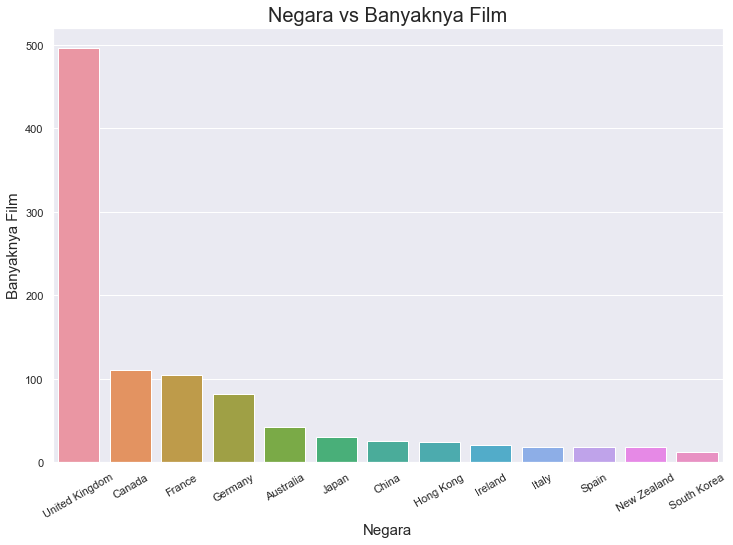

In [18]:
sns.barplot(x = top_countries.negara, y = top_countries['jumlah'])
plt.title('Negara vs Banyaknya Film', fontsize = 20)
plt.xlabel('Negara', fontsize = 15)
plt.ylabel('Banyaknya Film', fontsize = 15)
plt.xticks(list(range(13)), top_countries['negara'], rotation = 30)
plt.show()

Lalu dilanjut dengan membuat barplot dengan nilai dari kolom negara pada top_countries dan juga value dari kolom jumlah pada top_countries. lalu ada plt.xticks untuk mengubah label pada sumbu x menajadi nama-nama dari ke-13 negara tadi. dengan memanfaatkan kolom negara pada dataframe top_countries.

KESIMPULAN :

Grafik batang ini menunjukkan jumlah film asing yang dirilis di negara asal setiap film. Visualisasi tersebut menunjukkan bahwa pasar film luar negeri didominasi oleh film-film dari Barat (Inggris, Prancis, Kanada, dan sebagainya). Sebagai catatan, film Jepang, India, dan Hongkong masuk dalam 10 besar, namun jumlahnya sangat kecil dibandingkan dengan jumlah film dari Inggris atau Prancis.

# Genre vs Rating
#### Apakah suatu genre film memengaruhi dalam pemberian rating terhadap film itu sendiri...

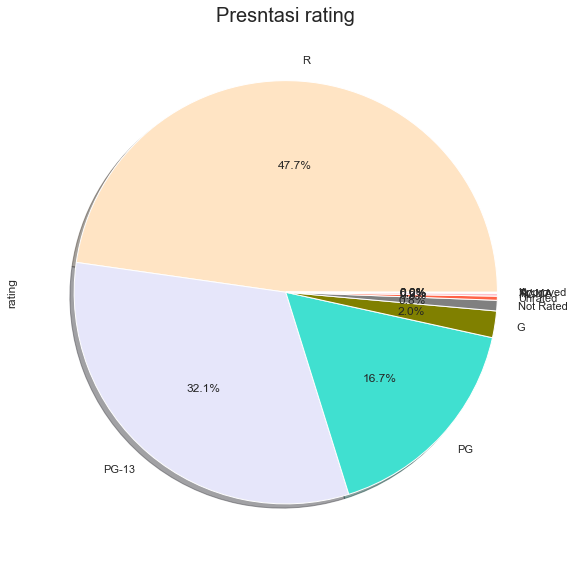

In [19]:
# Menampilkan rating dan jumlah filmnya

df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8),
                                    colors=['bisque','lavender','turquoise','olive','grey','tomato', 'pink', 'lightblue'])
plt.title('Presntasi rating', fontsize = 20)
plt.tight_layout()
plt.show()

Mengambil kolom rating pada df dan diberikan fungsi value_count() agar mengetahui jumlah film per ratingnya, lalu langsung di plot ke pie chart dengan menggunakan plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8)). autopct adalah untuk menampilkan presentase pada pie tersebut, lalu untuk shadow true adalah menampilkan bayangan, dan figsize adalah ukuran dari pie chart itu sendiri, untuk color berarti adalah warna bagian dari pie pie yang ada.

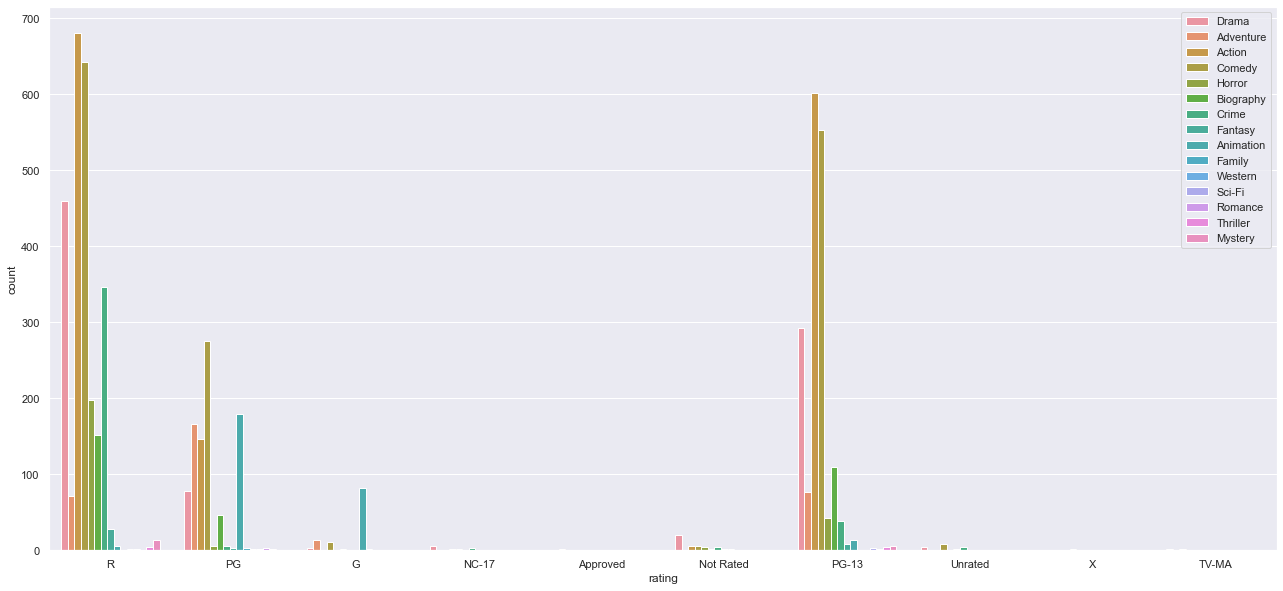

In [20]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating',data = df ,hue='genre')
plt.legend(loc='upper right')
plt.show()

Lalu membuat grafik bar untuk menentukan apakah banyaknya film dalam suatu rating sesuai dengan genre yang seharunya ada.
dengan langkah pertama adalah membuat figsizenya terlebih dahulu yakni dengan plt.figure(figsize = (22,10)). lalu sns.countplot dengan nilai x adalah kolom rating pada dataframe df dengan hue kolom genre. untuk memperjelas lagi, maka tampilkan legend suatu grafik yang mana nilainya adalah hue tadi. dengan menggunakan plt.legend(loc='upper right').
hue sendiri adalah Pengelompokan variabel yang akan menghasilkan elemen dengan warna yang berbeda. Dapat berupa kategoris ataupun numerik. dalam kasus ini hue kami adaalah tipe kategoris.

In [21]:
tag = "Action"
small = df[df["genre"] == tag]
UK = small[small["country"] == "United Kingdom"][["name", "country","year"]].head(10)
UK

,name,country,year
99,Clash of the Titans,United Kingdom,1981
112,For Your Eyes Only,United Kingdom,1981
128,Dragonslayer,United Kingdom,1981
139,Outland,United Kingdom,1981
346,Krull,United Kingdom,1983
349,Octopussy,United Kingdom,1983
356,Never Say Never Again,United Kingdom,1983
374,Yellowbeard,United Kingdom,1983
475,The Terminator,United Kingdom,1984
509,Supergirl,United Kingdom,1984


Mengecek film dari negara United Kingdom dan filmnya yang bergenre action saja. lalu ditampilkan dalam bentuk dataframe simpel yang hanya ada 10 baris dan disimpan pada variabel UK

KESIMPULAN  
  
- Kita dapat melihat bahwa sebagian besar film berperingkat R dan PG, dan sebagian besar film berasal dari genre Petualangan, Aksi, dan Komedi (Genre yang cukup banyak kalangan bisa menonton, namun juga terkadang bisa ada kekerasan didalamnya). Hal tersebut telah sesuai dengan yang seharusnya karena R adalah film yang diperuntukkan bagi usia 17 tahun ke atas dan PG (Parental Guidance) Artinya adalah Bimbingan Orang Tua. Label PG disematkan dalam film ini karena sebagian materi dalam film belum cocok ditonton oleh anak-anak di bawah umur. Ketidaksopanan film PG ini biasanya masih sebatas kata-kata kasar atau adegan bullying ringan, sehingga orang tua wajib memberikan pengertian.

- Film berperingkat G sebagian besar adalah film keluarga! (seperti yang diharapkan!) karena rating G (general) berarti untuk penonton umum, semua usia. Rating G berarti film aman untuk anak-anak. Namun, perlu dicatat, rating G bukan berarti film itu merupakan film anak-anak. Film dengan rating ini dinyatakan tidak mengandung konten dengan bahasa atau tindak kekerasan yang tidak layak disaksikan anak-anak.

- untuk film yang rating PG-13 berarti Orangtua perlu sangat berhati-hati, beberapa materi mungkin tak pantas untuk anak di bawah 13 tahun. Dan sesuai seperti di bar chart di atas, Action Comedy lebih banyak di rating PG-13 karena kemungkinan besar ada beberapa kata dan juga perilaku kurang baik dalam film tersebut.

# Revenue by genre of movies

Text(0.5, 1.0, 'Revenue Dari Genre Film')

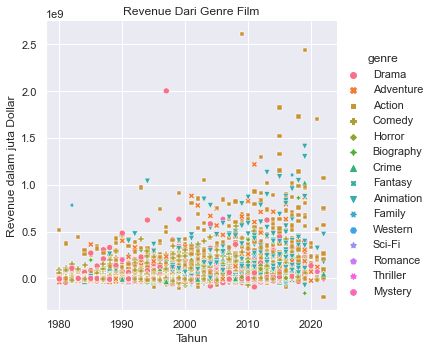

In [22]:
sns.relplot(data=df,x='year',y='revenue',hue='genre',style='genre')
plt.xlabel('Tahun')
plt.ylabel('Revenue dalam juta Dollar')
plt.title('Revenue Dari Genre Film')

kami menentukan pendapatan bersih dari suatu film dengan berdasarkan genrenya. lalu disini membuat scatter plot dengan menggunakan hue yakni genre agar menampilkan revenue berdasarkan genrenya dan dibedakan menjadi warna atau simbol yang berbeda tiap jenis genre. lalu ada nilai x yakni kolom year pada dataframe df., dan juga nilai y adalah kolom revenue dari dataframe df

Kesimpulan :


# Geographical plotting
#### untuk menampilkan banyak produksi film pada suatu negara

In [23]:
Negara = pd.DataFrame(df['country'].value_counts()) 

frame_satu = Negara.index.to_frame(index=False, name = 'countries') 
frame_dua = Negara.reset_index(drop = True) 
frame_dua = frame_dua.rename(columns={'country': 'Total_movies'})

Data = frame_satu.join(frame_dua)

Data.head(10)

,countries,Total_movies
0,United States,4354
1,United Kingdom,496
2,Canada,111
3,France,105
4,Germany,82
5,Australia,42
6,Japan,31
7,China,26
8,Hong Kong,25
9,Ireland,21


Pertama disini adalah mengambil data kolom country pada dataframe df dan menghitung jumlahnya per-negera lalu disimpan pada variabel Negara. selanjutnya Mengambil nilai dari index dataframe Negara (yang berisi nama negara) menjadikannya frame pada dataframe frame_satu dengan nama kolom countries. Lalu Mengambil jumlah value count dari Dataframe Negara, dan mereset indexnya menjadi int urut dari 0 hingga len(n)-1 dan disimpan pada frame_dua. Selanjutnya Mengubah nama kolom yang ada pada dataframe frame_dua yang awalnya adalah country menjadi Total_Movies. Terakhir adalah Menggabung dataframe frame_satu dan frame_dua menjadi kedalam satu dataframe yang memiliki 2 kolom, yakni countries dan Total_movies dan lagi-lagi di assign/simpan kedalam variabel Data yang akan kita gunakan.

In [27]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # mengumpulkan file dataset yang ada pada geopandas
country_geo = list(world['name']) # Negara di file geopandas
country_data = list(df['country'].unique()) # Countries in my dataset

country_diff = [country for country in country_data if country not in country_geo]
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00000,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50000,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00000,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00000,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.00000,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.00000,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.00000,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.00000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Mengambil file dari library gpd, untuk mendapatkan letak koordinat dari suatu negara. lalu menyamakan negara yang ada di file gpd dan negara yang ada pada dataframe awal yakni df. memilihnya menggunakan syntax [country for country in country_data if country not in country_geo] dan diberi variabel baru yakni country_diff

C:\Users\rendi\AppData\Local\Temp\ipykernel_11972\2787120130.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sm, orientation='horizontal')


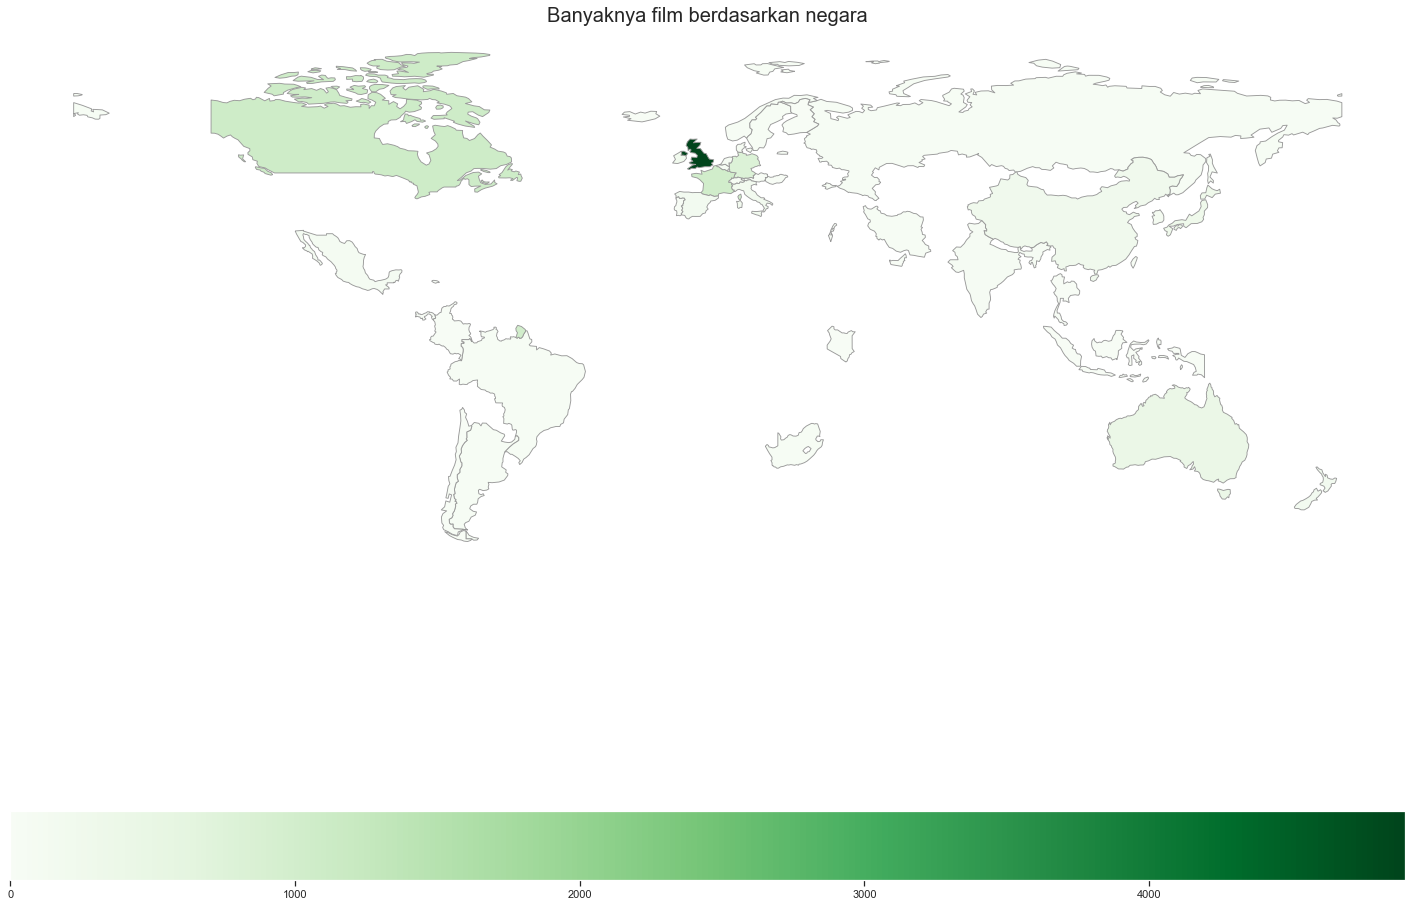

In [25]:
import geopandas as gpd
import folium
mapped = world.set_index('name').join(Data.set_index('countries')).reset_index()

to_be_mapped = 'Total_movies'
vmin, vmax = 0,4900
fig, ax = plt.subplots(1, figsize=(25,30))

mapped.dropna().plot(column=to_be_mapped, cmap='Greens', linewidth=0.9, ax=ax, edgecolors='0.6')
ax.set_title('Banyaknya film berdasarkan negara', fontdict={'fontsize':20})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

Disini kami menampilkan letak map geografis dari beberapa negara yang memiliki banyak produksi film, diantaranya ada negara United States, United Kingdom, Canada, dan lainnya. seperti pada gambar map diatas maka, semakin tebal berarti itu adalah daerah yang paling banyak menghasilkan film.

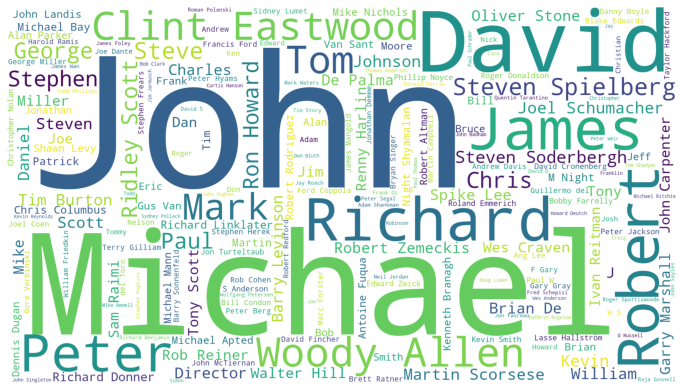

In [26]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



Memanggil Library Wordcloud yang dimana digunakan untuk menapilkan gambar yang menunjukkan daftar kata-kata yang digunakan dalam sebuah teks, umumnya semakin banyak kata itu ada semakin besar pula ukuran kata tersebut dalam gambar. jadi kami disini ingin memberikan suatu visualisasi variasi yang dimana memunculkan nama-nama dari director yang banyak muncul. jadi bisa dilihat dari gambar, direktur yang paling banyak membuat film disini adalah John, Michael, David, Richard dan James.